<a href="https://colab.research.google.com/github/sysphcd/PythonProgrammingforData/blob/main/8_1_Correlation_with_linregress_WITH_scipy_library.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces **scipy** library

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package 
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`) 

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit 


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up 

In [16]:
import pandas as pd
from scipy.stats import linregress

def compare_linear_regression(df,col1,col2):
  x = df[col1]
  y = df[col2]
  regression = linregress(x,y)
  display(regression)
  slope = regression.slope
  intercept = regression.intercept
  rsquare=regression.rvalue**2
  print("slope=",slope)
  print("intercept=",intercept)
  print("r-quare=",rsquare)
  return regression, slope, intercept, rsquare

url= 'https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true'
county_level_df = pd.read_excel(url,sheet_name='county-level')
compare_linear_regression(county_level_df,'Age','Income')

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189)

slope= -0.31433084434233205
intercept= 72.78388856978748
r-quare= 0.021866754112003717


(LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189),
 -0.31433084434233205,
 72.78388856978748,
 0.021866754112003717)

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Expected output**:   
0.013558605755058871


In [17]:
compare_linear_regression(county_level_df,'Population','Income')

LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115)

slope= 0.05737132629483762
intercept= 60.95698211316883
r-quare= 0.013558605755058871


(LinregressResult(slope=0.05737132629483762, intercept=60.95698211316883, rvalue=0.11644142628402862, pvalue=0.6454275157910035, stderr=0.12233846479490115),
 0.05737132629483762,
 60.95698211316883,
 0.013558605755058871)

**slope 0.05737132629483762 -** this indicates that the line plotting Population against Income slopes upwards implying that income reduces with Population

**Intercept 60.95698211316883 - ** this indicates that income level starts at 60.95698211316883 and reduces from there by Population


**rvalue 0.013558605755058871 - ** which indicates how closely income follows population and whether it goes up as population goes up or goes down as population goes up

### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later 

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

In [29]:
from scipy import stats

def check_significance(regression):

  pvalue= regression.pvalue
  if pvalue < 0.05:
    print("model is significant, p <.05 : ",pvalue)
  else :
    print("model is not significant, p <.05 : ",pvalue)

  
#program starts here
url= 'https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true'
psycho_df = pd.read_csv(url)
regression, slope, intercept, rsquare = compare_linear_regression(psycho_df,'Stress','Wellbeing')
check_significance(regression)

# print("P value tells how close to extreme the data actually is.")
# print("P value and alpha values are compared to establish the statistical significance.")
# print("If p value <= alpha we reject the null hypothesis and say that the data is statistically significant. ")
# print("otherwise we accept the null hypothesis.")


LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)

slope= -0.6279050248852254
intercept= 37.713488379900454
r-quare= 0.4507725540176983
model is significant, p <.05 :  6.084540561441803e-07


# Create some charts and make some predictions from regressions

1.  Using what you know from completing the Visualisation worksheets (matplotlib and Seaborn), plot the various regression results in a set of charts.
2.  Use the slope and intercept to calculate a prediction for a reasonable value (e.g. predict an income for a given age using the slope and intercept from the regression to calculate income from the formula `age * slope + intercept`

the chart is generated by matplotlib.pyplot. it is showing a positive result. 


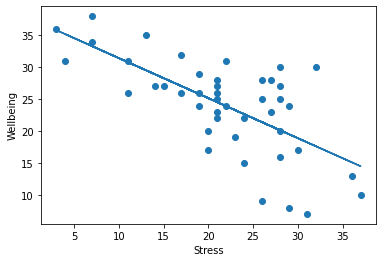

the chart is generated by seaborn. it is showing a positive result. 


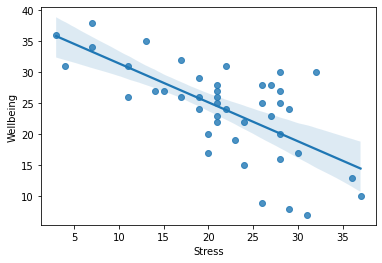

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_scatterplot(df,col1,col2):
  #scatterplot of Hours and Scores 
  x_col1 = df[col1]
  y_col2 = df[col2]
  plt.scatter(x_col1,y_col2)
  regression = linregress(x_col1,y_col2)
  slope = regression.slope
  intercept = regression.intercept
  plt.plot(x_col1,slope*x_col1 + intercept)
  plt.xlabel(col1)
  plt.ylabel(col2)
  print("the chart is generated by matplotlib.pyplot. it is showing a positive result. ")
  # print("y = c + b*x, where y = estimated dependent variable score, c = constant, ")
  # print("b = regression coefficient, and x = score on the independent variable.")
  plt.show()
  

def show_scatter_sns(df,col1,col2):
  
  x = df[col1]
  y = df[col2]
  #chart = sns.scatterplot(x=x, y=y)
  chart=sns.regplot(x=x, y=y)
  chart.set_xlabel(col1)
  chart.set_ylabel(col2)
  print("the chart is generated by seaborn. it is showing a positive result. ")

  

show_scatterplot(psycho_df,'Stress','Wellbeing')
show_scatter_sns(psycho_df,'Stress','Wellbeing')


# Further reference on linear regression

[at statisticalsolutions.com](https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/what-is-linear-regression/)